<h1>Line Fitting</h1>

Firstly, we handle the imports and load the data from the files provied

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import torch


x_train_data = np.load('Datasets/IRIS/iris_train_samples.npy')
y_train_data = np.load('Datasets/IRIS/iris_train_labels.npy')
x_test_data = np.load('Datasets/IRIS/iris_val_samples.npy')
y_test_data = np.load('Datasets/IRIS/iris_val_labels.npy')

Implement the normal equation solver function nsolve, which takes as input the matrix X and the
target vector y and returns the optimized weights w.</b>

In [18]:
def nsolve(X, y):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]  # adds the bias term
    w_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    return w_best 

Implement lineFit(X,y) which should fit a linear function to the input data. Test your implementation
on the following task: predict with linear fitting the petal length (cm) of the Iris dataset using the three remaining variables as inputs (sepal length (cm), sepal width (cm) and petal width (cm)).</b>

Before we begin predicting the data, we must split the training data such that sepal length, sepal width, and petal width are the features, and petal length is the new target that we attempt to predict.

In [19]:
def feature_split(X):
    y_split = X[:, [2]]
    X_split = X[:, [0, 1, 3]]
    return X_split, y_split

In [20]:
x_train, y_train = feature_split(x_train_data)
x_test, y_test = feature_split(x_test_data)

Following, we can now predict on the testing data by learning the weights through the nsolve(X,y) function 

In [21]:
def lineFit(X, y):
    w_best = nsolve(X, y)  # gets the optimal weights with shape (3,1)
    y_pred = w_best[0] + np.dot(x_test, w_best[1:])
    plt.plot(X, y, 'b.')  # plot the data points
    plt.plot(x_test, y_pred, 'r.')  # plot the predicted values
    plt.plot(x_test, y_test, 'g.')  # plot the actual values
    plt.xlabel("$x_1$", fontsize=18)
    plt.ylabel("$y$", rotation=0, fontsize=18)
    mse = np.sum((y_pred - y_test)**2) / y_test.size
    plt.text(0.8, 7.5, "L2 Loss (MSE): " + str(mse))
    plt.show()

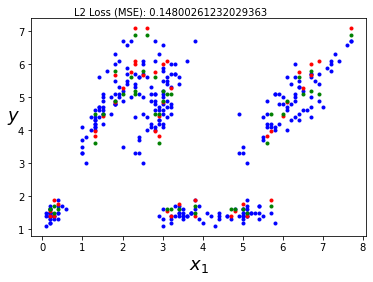

In [22]:
lineFit(x_train, y_train)

Implement polyFit(X,y) which should fit a 2nd degree polynomial to the input data. Test your
implementation on the following task: predict with the polynomial the petal width (cm) of the Iris
dataset using the three remaining variables as inputs (sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)).</b>

To do this, we must first define a function to form the design matrix, as it will replace our standard input varibale X. 

In [23]:
def design_matrix(X):
    X_d = []
    for ex in X:
        d_row = []
        ex = np.insert(ex, 0, 1)
        for i in range(ex.shape[0]):
            for j in range(i, ex.shape[0]):
                d_row.append(ex[i]*ex[j])
        X_d.append(d_row)
    return np.array(X_d)

In [24]:
def polyFit(X, y):
    X_d = design_matrix(X)
    w_best = np.linalg.inv(X_d.T.dot(X_d)).dot(X_d.T).dot(y)
    X_d_test = design_matrix(x_test)
    y_pred = np.dot(X_d_test, w_best)
    plt.plot(X, y, 'b.')  # plot the data points
    plt.plot(x_test, y_pred, 'r.')  # plot the predicted values
    plt.plot(x_test, y_test, 'g.')  # plot the actual values
    plt.xlabel("$x_1$", fontsize=18)
    plt.ylabel("$y$", rotation=0, fontsize=18)
    mse = np.sum((y_pred - y_test)**2) / y_test.size  # recheck this
    plt.text(0.8, 7.5, "L2 Loss (MSE): " + str(mse))
    plt.show()

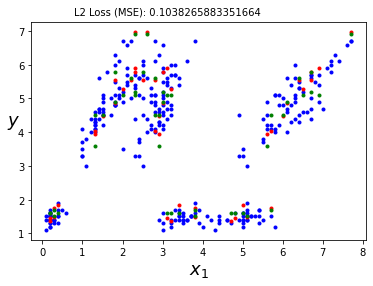

In [25]:
polyFit(x_train, y_train)

<h1>Clustering</h1>

Implement a function pca(X, ndims) that performs PCA over the input data X and returns both the
mean vector X and the ndims top components. Display the top 10 components fitted on the train dataset as
images and check that you can reconstruct perfectly an input digit from the validation set using all
components. </b>

In [30]:
def pca(X, ndims):
    # subtract mean from all samples
    mean = np.mean(X, axis=0)
    X -= mean

    # find the eiganvalues of the cov matrix
    # cov = np.cov(X, rowvar=0)
    cov = np.cov(X.T)
    eig_vals, eig_vecs = np.linalg.eig(np.mat(cov))

    # sort the list and reverse the order
    sorted_idx = np.argsort(eig_vals)[::-1]
    eig_vals = eig_vals[sorted_idx]
    eig_vecs = eig_vecs.T[sorted_idx]

    p_components = eig_vecs[0:ndims]
    return mean, p_components

def project(X, p_components):
    mean = np.mean(X, axis=0)
    X -= mean
    return np.dot(X, p_components.T)

To show the top components, we implement a show function an call it on the top n components returned by the pca function. 

In [31]:
def show(c):
    N, feat = c.shape
    plt.figure(figsize=(12, 8))
    for i, img in enumerate(c):
        torch_img = torch.tensor(img, dtype=torch.float32)
        ax = plt.subplot(2, 5, i+1)
        ax.imshow(
            (255 - torch_img).view(28, 28).detach().cpu().numpy(), cmap="gray")
        plt.axis('off')
    plt.show()

Next we load the MNIST dataset and call our functions. 

<ipython-input-31-75dc11772206>:5: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at  ../aten/src/ATen/native/Copy.cpp:162.)
  torch_img = torch.tensor(img, dtype=torch.float32)


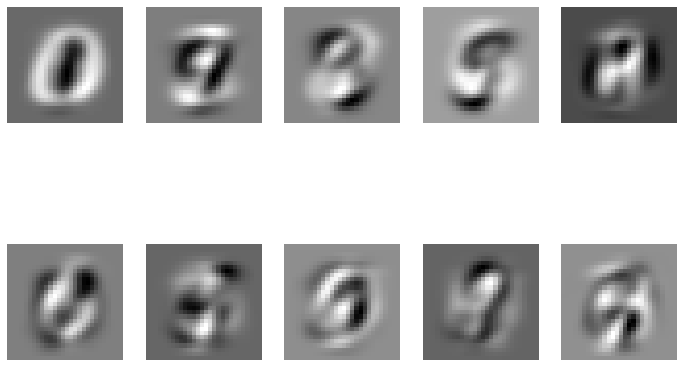

In [32]:
x_train_data = np.load('Datasets/MNIST/mnist_train_samples.npy')
y_train_data = np.load('Datasets/MNIST/mnist_train_labels.npy')
x_test_data = np.load('Datasets/MNIST/mnist_val_samples.npy')
y_test_data = np.load('Datasets/MNIST/mnist_val_labels.npy')

mean, components = pca(x_train_data, 10)
show(components)

Implement a function kmeans performing k-means on input data X. Propose the interface to that function and write in three sentences why this is. Apply you Kmeans implementation on the MNIST training set with k = 10 clusters and display the centroids as images.</b>

Kmeans clustering follows an iterative optimization approach like such:
    1. randomly initialize K centroids
    2. repeat the following until converged:
        2a. assign points to the nearest centroid
        2b. re-assign centroids to the mean of each cluster
        
To do this we must implement numerous helper functions... 

In [36]:
def euc_distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))


def create_clusters(X, K, centroids):
    clusters = [[] for _ in range(K)]  # init N clusters in a list
    for idx, sample in enumerate(X):
        # finds the index of the closest cetroid
        closest_centroid_idx = closest_centroid(sample, centroids)
        clusters[closest_centroid_idx].append(
            idx)  # adds the index to that cluster
    return clusters


def closest_centroid(x, centroids):
    # get distance to all centroids
    euc_distances = [euc_distance(x, c_point) for c_point in centroids]
    return np.argmin(euc_distances)


def get_upd_centroids(X, K, clusters):
    N, feat = X.shape
    upd_centroids = np.zeros((K, feat))
    for cluster_idx, cluster in enumerate(clusters):
        cluster_mean = np.mean(X[cluster], axis=0)
        upd_centroids[cluster_idx] = cluster_mean
    return upd_centroids


def is_converged(K, old_centroids, upd_centroids):
    euc_distances = [euc_distance(
        old_centroids[i], upd_centroids[i]) for i in range(K)]
    return np.sum(euc_distances) == 0


def label_clusters(N, clusters):
    labels = np.empty(N)
    for class_id, cluster in enumerate(clusters):
        for sample_idx in cluster:
            labels[sample_idx] = class_id
    return labels

Using all this, we can implement our function.

In [39]:
def kmeans(X, K):
    iterations = 10
    cluster_idx = [[] for _ in range(K)]
    centroids = []
    clusters = []

    # init centroids
    N, n_features = X.shape
    # selects N random centroid indices
    random_centroids = np.random.choice(N, K, replace=False)
    centroids = [X[idx] for idx in random_centroids]

    for i in range(iterations):
        # create clusters
        clusters = create_clusters(X, K, centroids)
        # update clusters
        old_centroids = centroids
        centroids = get_upd_centroids(X, K, clusters)
        # convergence check
        if is_converged(K, old_centroids, centroids):
            break
    return centroids, label_clusters(N, clusters)

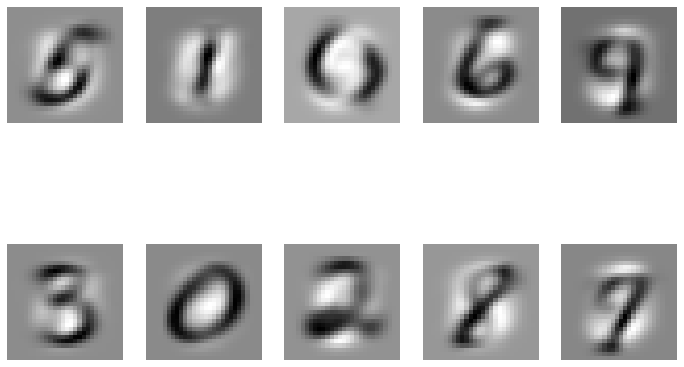

In [40]:
centroids, labels = kmeans(x_train_data, 10)
show(centroids)

<h1>Linear Classification</h1>

<b> Implement the normal equation-based binary linear classifier lclass(examplesA, examplesB, testExample)
where the first two arguments are the set of samples from class A and class B respectively and the third
is the test. The function should return 0 if test is in A and 1 otherwise.</b>

Because we the function takes two classes of examples as input, ad because our output should be either a 0 or a 1, we first need to define a function to split and re-label the dataset so that samples beloning to class index K are labeled with a 0, and those that are not are labeled with a 1. 

In [41]:
def choose_class(K):
    positive_class = x_train_data[[x == K for x in y_train_data]]
    negative_class = x_train_data[[x != K for x in y_train_data]]
    return positive_class, negative_class

In [42]:
def lclass(examplesA, examplesB, testExample):
    # make 2 new label arrays for examplesA (value = 0) and examplesB (value = 1)
    num_rows, num_cols = examplesA.shape
    positive_labels = np.zeros((num_rows,))
    num_rows, num_cols = examplesB.shape
    negative_label = np.ones((num_rows,))

    # concatenate the results to make new X and y
    X = np.concatenate([examplesA, examplesB])
    y = np.concatenate([positive_labels, negative_label])

    # shuffle the data
    p = np.random.permutation(y.shape[0])
    X = X[p]
    y = y[p]

    # learn the optimal weights
    X = np.c_[np.ones((X.shape[0], 1)), X]  # add the bias term
    w_best = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    # predict y (which should give a value [0,1] based on how strongly the example matches)
    y_pred = np.round(w_best[0] + np.dot(testExample, w_best[1:]))
    return y_pred.astype(np.int16)

We can then load the data, relabel it using our helper function, and call the function to get the predictions.

In [44]:
x_train_data = np.load('Datasets/IRIS/iris_train_samples.npy')
y_train_data = np.load('Datasets/IRIS/iris_train_labels.npy')
x_test_data = np.load('Datasets/IRIS/iris_val_samples.npy')
y_test_data = np.load('Datasets/IRIS/iris_val_labels.npy')

positive_class, negative_class = choose_class(0) # choose Iris Setosa (label = 0) as the positive class
preds = lclass(positive_class, negative_class, x_test_data)
print(preds)

[0 0 1 1 1 1 1 1 0 0 1 1 0 1 1]


Test this on all the samples in Iris, Setosa vs non-Setosa, etc and propose a simple analysis (text,
figure, table) of the result you find, but not longer than the third of a page.</b>

In [45]:
def compare_classifiers(K):
    loss = []
    missclassified_classes = []
    class_idx = np.arange(K).astype(np.int16)
    # calculate loss for each class
    for i in range(K):
        positive_class, negative_class = choose_class(i)
        preds = lclass(positive_class, negative_class, x_test_data)
        truth = [0 if y == i else 1 for y in y_test_data]
        wrong_pred_idx = [True if x == 1 else False for x in np.abs(
            preds - truth)]  # indices that are predicted incorrectly
        wrong_preds = y_test_data[wrong_pred_idx]
        missclassified_classes.append(wrong_preds)
        wrong = np.sum(np.abs(preds - truth))
        perc_misclassified = wrong/y_test_data.size
        loss.append(perc_misclassified)
    plt.figure()
    plt.xlabel('Class Index')
    plt.ylabel('% Wrongly Predicted')
    plt.scatter(class_idx, loss)
    plt.show()
    print(missclassified_classes)

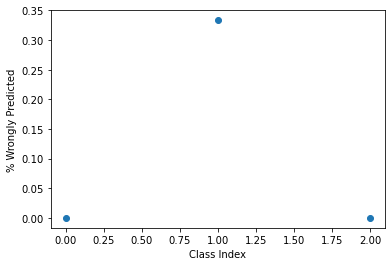

[array([], dtype=int64), array([2, 1, 2, 1, 1]), array([], dtype=int64)]


In [46]:
compare_classifiers(3)

From this we can see that the model performs perfectly when classifing examples with labels 0 (Iris Setosa) or 2 (Iris Virginica), but predicts examples of class 1 (Iris Versicolour) wrongly 33% of time. Further investigation on these misclassified examples for class 1 shows that the model struggles to tell apart classes 1 and 2, implying that the two are very similar. On the other hand, we can see that class 0 is easily linearly seperable from both classes 1 and 2 through the normal equations. This explains why the model has %100 sucess in distinguishing class 0 from the rest. In comparison, for classes 1 and 2 the linear boundry is not enough to distinguish the area of overlap between the two, so the misclassified labels are always 1's classified and 2's and visa-versa. This is an example of underfitting due to the lack of model complexity and can be remedied by adding non-linearities to the model. 

<b>Implement lmclass(examples, class, testExamples) that performs multi-class classification of the examples examples according to the vector of labels class of the same size and test it with testExamples by returning a matrix, where each row expresses the probability of a sample in testExamples to belong to each class</b>

In [47]:
def lmclass(examples, classes, testExample):
    # add the bias term to x's
    X = np.c_[np.ones((examples.shape[0], 1)), examples]

    # one-hot the encode y's
    num_classes = np.unique(classes).size
    encoded_y = np.eye(num_classes)[np.array(classes).reshape(-1)]
    encoded_y.reshape(list(classes.shape)+[num_classes])

    # learn the weights
    w_best = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(encoded_y)

    y_pred = w_best[0] + np.dot(testExample, w_best[1:])
    print(y_pred)
    return y_pred

Present findings applying multi-class classification on Iris dataset with 3 classes. You can include
figures and tables if needed. Write no longer than ten sentences. </b>

In [48]:
probs = lmclass(x_train_data, y_train_data, x_test_data)
print(probs)
preds = np.argmax(probs, axis=1)
misclassified_examples = [(i, j) for i, j in zip(preds, y_test_data) if i != j]
perc_misclassified = len(misclassified_examples) / len(preds)
print(perc_misclassified) # percentage of misclassified test samples
print(misclassified_examples) # the misclassified examples and their actual labels
print(preds) # the whole prediction set
print(y_test_data) # the ground truth for comparison

[[ 0.86674934  0.16735048 -0.03409982]
 [ 0.99500156  0.06678892 -0.06179048]
 [-0.44738461  0.6652941   0.78209051]
 [-0.04481239  0.23213096  0.81268143]
 [ 0.11434136  0.39509938  0.49055926]
 [ 0.04737521  0.28373455  0.66889023]
 [-0.2538077   0.68470713  0.56910057]
 [ 0.09838501  0.46967234  0.43194266]
 [ 0.79055013  0.36770249 -0.15825262]
 [ 0.81983117  0.29827212 -0.11810329]
 [ 0.00689523  0.19741913  0.79568565]
 [ 0.0612056   0.17494773  0.76384667]
 [ 1.0196855  -0.02075439  0.00106889]
 [-0.17129154  0.35242413  0.8188674 ]
 [ 0.28412451  0.35950296  0.35637253]]
[[ 0.86674934  0.16735048 -0.03409982]
 [ 0.99500156  0.06678892 -0.06179048]
 [-0.44738461  0.6652941   0.78209051]
 [-0.04481239  0.23213096  0.81268143]
 [ 0.11434136  0.39509938  0.49055926]
 [ 0.04737521  0.28373455  0.66889023]
 [-0.2538077   0.68470713  0.56910057]
 [ 0.09838501  0.46967234  0.43194266]
 [ 0.79055013  0.36770249 -0.15825262]
 [ 0.81983117  0.29827212 -0.11810329]
 [ 0.00689523  0.1974191

Firsty, becuase the function isnt limits are not bounded to [0,1] like the sigmoid function, the outputted probability of a test example belonging to a specific class can take on small negative values, but the summation of all three probabilites always results to 1 in accordance with the law of total probability and this can be verified through the printed statements. Hence, despite the use of normalisation, standardization or a probability mapping function, the model behaves as intended. The following lines are intended to quantify the model performance and highlight the misclassified examples. In comparison to the previous experiments, this model performs much better, only misclassifing 13% of the test examples. Similar to before, however, we can see that the only cases where the model still stuggles are when distinguishing classes 1 and 2. The model performs better because the model trains 

<h1>Non-linear Classification</h1>

<b> Implement classification based on logistic regression using GD by implementing the gradient function deLogistic(preds, X, Y) and optimizing using GD. preds are the prediction from the model, X are the data and Y are the labels. Propose a function interface for your implementation of the gradient descent algorithm. </b>

First we implement the sigmoid function that will be useful later as well. 

In [49]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [50]:
def deLogistic(preds, x, y):
    m = len(y)  # sample size
    # derivative of the loss function, direction of steepest descent
    grad = 1 / m * ((y - preds).dot(x))
    return grad

In [58]:
def log_reg(x, y, class_id): 
    alpha = 0.1  # learning rate
    iterations = 10000

    # add bias term to all samples
    X = np.c_[np.ones((x.shape[0], 1)), x]

    # label y where positive samples = 1 and 0 otherwise
    one_v_all = np.where(y == class_id, 1, 0)

    # init weights
    n_samples, n_features = X.shape
    w = np.zeros(n_features)

    # gradient descent
    for _ in range(iterations):
        preds = sigmoid(X.dot(w))
        grad = deLogistic(preds, X, one_v_all)
        w = w + alpha * grad  # gradient descent
    return w

In [59]:
def log_predict(thetas, x):
    X = np.c_[np.ones((x.shape[0], 1)), x]  # add the bias term
    preds = []
    for xi in X:
        preds.append(sigmoid(xi.dot(thetas)))
    return [1 if pred > .5 else 0 for pred in preds]

In [60]:
w = log_reg(x_train_data, y_train_data, 0) # here, the final arguement is the identifying index of class to be classified
print(log_predict(w, x_test_data)) 
print(y_test_data)

[1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]
[0 0 2 2 1 2 2 1 0 0 2 2 0 2 1]


Implement classification based on hinge loss using GD by implementing the gradient function deHinge(preds,
W, X, Y) and optimizing using GD. preds are the prediction from the model, W describes the model parameters, x is the data and y represent the labels. Propose a function interface for your implementation
of the gradient descent algorithm. </b>

In [66]:
def deHinge(X, y, w, b, alpha, lamda_reg):
    for index, xi in enumerate(X):
        # if the example is correctly predicted
        if y[index] * (np.dot(xi, w) - b) >= 1:
            # simply regularize the model
            w = w - alpha * (2 * lamda_reg * w)
        else:  # if the example is wrongly predicted (oposing signs)
            # regularize AND move in steepest descent
            w = w - alpha * (2 * lamda_reg * w - np.dot(xi, y[index]))
            b = b - alpha * y[index]
    return w, b

In [67]:
def hinge_reg(X, y, class_id):
    alpha = 0.1  # learning rate
    iterations = 10000  # epochs
    lamda_reg = 0.01  # regulizer

    # label the classes
    y = [1 if yi == class_id else -1 for yi in y]

    # initialize the weights
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    b = 0

    # gradient descent
    for _ in range(iterations):
        w, b = deHinge(X, y, w, b, alpha, lamda_reg)
    return w, b

In [68]:
def hinge_predict(X, w, b):
    approx = np.dot(X, w) - b
    return np.sign(approx)

In [69]:
w_best, bias = hinge_reg(x_train_data, y_train_data, 0)
print(hinge_predict(x_test_data, w_best, bias))
print(y_test_data)

[ 1.  1. -1. -1. -1. -1. -1. -1.  1.  1. -1. -1.  1. -1. -1.]
[0 0 2 2 1 2 2 1 0 0 2 2 0 2 1]


<h1> Neural Networks </h1>

<b>Devise a three-layer neural network with n hidden states and sigmoid activations for classification.</b>

In [ ]:
 # Number of neurons for each layer
self.input_layer = input_layer
self.hidden_layer1 = hidden_layer1
self.hidden_layer2 = hidden_layer2
self.hidden_layer3 = hidden_layer3
self.output_layer = output_layer

# Initialisation of parameters W1, W2, W3, W4
self.W1 = np.random.rand(input_layer, hidden_layer1)
self.W2 = np.random.rand(hidden_layer1, hidden_layer2)
self.W3 = np.random.rand(hidden_layer2, hidden_layer3)
self.W4 = np.random.rand(hidden_layer3, output_layer)

<b>Implement the binary classifier nnclass(examplesA, examplesB, testExamples) that is trained with
your implementation of (stochastic) GD and your gradient function using the network. </b>

First we implement our helper functions to calculate error and gradients

In [ ]:
def sse(y_true, y_pred):
    return 0.5 * np.sum(np.power(y_pred - y_true, 2))


def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def sigmoid_prime(x):
    sig = sigmoid(x)
    return sig * (1 - sig)

In [ ]:
class FFNN:
    def __init__(self, input_layer, hidden_layer1, hidden_layer2, hidden_layer3, output_layer):
        # Number of neurons for each layer
        self.input_layer = input_layer
        self.hidden_layer1 = hidden_layer1
        self.hidden_layer2 = hidden_layer2
        self.hidden_layer3 = hidden_layer3
        self.output_layer = output_layer

        # Initialisation of parameters W1, W2, W3, W4
        self.W1 = np.random.rand(input_layer, hidden_layer1)
        self.W2 = np.random.rand(hidden_layer1, hidden_layer2)
        self.W3 = np.random.rand(hidden_layer2, hidden_layer3)
        self.W4 = np.random.rand(hidden_layer3, output_layer)

    # Method to train our model
    def fit(self, x, y_true, learning_rate=0.0001, epochs=1000):
        for epoch in range(epochs):
            error = 0
            # Forward Propagation
            z2 = np.dot(x, self.W1)
            a2 = sigmoid(z2)

            z3 = np.dot(a2, self.W2)
            a3 = sigmoid(z3)

            z4 = np.dot(a3, self.W3)
            a4 = sigmoid(z4)

            z5 = np.dot(a4, self.W4)
            yHat = sigmoid(z5)

            # Error computation
            error += sse(y_true, yHat)

            # Backward Propagation
            delta5 = np.multiply(-(y_true-yHat), sigmoid_prime(z5))
            dJW4 = np.dot(a4.T, delta5)

            delta4 = np.dot(delta5, self.W4.T)*sigmoid_prime(z4)
            dJW3 = np.dot(a3.T, delta4)

            delta3 = np.dot(delta4, self.W3.T)*sigmoid_prime(z3)
            dJW2 = np.dot(a2.T, delta3)

            delta2 = np.dot(delta3, self.W2.T)*sigmoid_prime(z2)
            dJW1 = np.dot(x.T, delta2)

            self.W1 -= learning_rate*dJW1
            self.W2 -= learning_rate*dJW2
            self.W3 -= learning_rate*dJW3
            self.W4 -= learning_rate*dJW4

            # Show error at each epoch
            error /= x.shape[0]
            print(f"[INFO]: epoch = {epoch + 1} | error = {error}")

    def predict(self, x):
        z2 = np.dot(x, self.W1)
        a2 = sigmoid(z2)

        z3 = np.dot(a2, self.W2)
        a3 = sigmoid(z3)

        z4 = np.dot(a3, self.W3)
        a4 = sigmoid(z4)

        z5 = np.dot(a4, self.W4)
        yHat = sigmoid(z5)
        return yHat


In [ ]:
x_train_data = np.load('Datasets/MNIST/mnist_train_samples.npy')
y_train_data = np.load('Datasets/MNIST/mnist_train_labels.npy')
x_test_data = np.load('Datasets/MNIST/mnist_val_samples.npy')
y_test_data = np.load('Datasets/MNIST/mnist_val_labels.npy')


# standerdize the data
x_train_data = (x_train_data - np.mean(x_train_data)) / np.std(x_train_data)
x_test_data = (x_test_data - np.mean(x_test_data)) / np.std(x_test_data)

class_id = 2
x_train = np.c_[np.ones((x_train_data.shape[0], 1)), x_train_data]
x_test = np.c_[np.ones((x_test_data.shape[0], 1)), x_test_data]
y_train = np.array([[1] if y == class_id else [0] for y in y_train_data])
y_test = np.array([[1] if y == class_id else [0] for y in y_test_data])

n_inputs = len(x_train[0])
n_hidden1 = 32
n_hidden2 = 16
n_hidden3 = 1
n_outputs = len([y_train[0]])

In [ ]:
# Network object creation and training
fnn = FFNN(n_inputs, n_hidden1, n_hidden2, n_hidden3, n_outputs)
fnn.fit(x_train, y_train)